In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')
#%cd /https://drive.google.com/drive/folders/1uQr2UW8XUmsWjECrAo7_TTDuUc9S23yF
#%cd https://drive.google.com/drive/folders/1uQr2UW8XUmsWjECrAo7_TTDuUc9S23yF?usp=drive_link

In [4]:
random_state = 1234

In [5]:
hints_data = pd.read_csv("../Data/final_hints_dataset.csv")


In [6]:
print(hints_data.shape)
hints_data.head()

(2422, 41)


,BornInUSA,NotHisp,Mexican,PuertoRican,Cuban,OthHisp,White,Black,AmerInd,AsInd,...,CancerAttention_PrintNews,GeneralHealth,OwnAbilityTakeCareHealth,MedConditions_Diabetes,MedConditions_HighBP,MedConditions_HeartCondition,MedConditions_LungDisease,MedConditions_Arthritis,MedConditions_Depression,EverHadCancer
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,3.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0


In [7]:
cancer_counts = hints_data['EverHadCancer'].value_counts()
cancer_counts

EverHadCancer
0.0    2123
1.0     299
Name: count, dtype: int64

## Fitting a Logitic Regression

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import StratifiedKFold, cross_val_score


In [9]:
X,y = hints_data.drop("EverHadCancer", axis=1), hints_data.EverHadCancer

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)


In [11]:
baseline = LogisticRegression(max_iter=10000)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)


In [12]:
selectors = []
selected_features = []
selector = RFECV(estimator = baseline, cv=kfold, min_features_to_select = 1, step = 1, scoring = "accuracy")
selector.fit(X_train,y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=1234, shuffle=True),
      estimator=LogisticRegression(max_iter=10000), scoring='accuracy')

<function matplotlib.pyplot.show(close=None, block=None)>

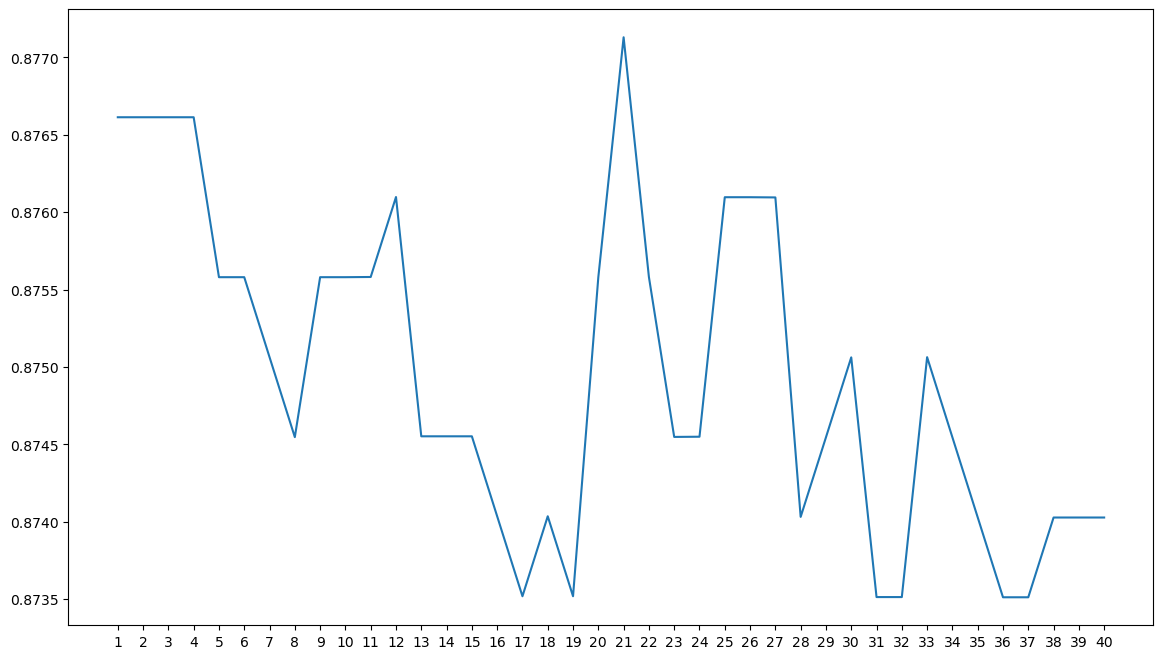

In [13]:
x = np.arange(1,41,1)
mean = selector.cv_results_['mean_test_score']
stderr = selector.cv_results_['mean_test_score']/np.sqrt(5)

plt.figure(figsize=(14, 8))
plt.plot(x, mean)
plt.xticks(x)
plt.show

In [14]:
# Get the selected features
selected_features = X_train.columns[selector.support_]

# Print the selected features
print("Selected features leading to the best accuracy:")
print(selected_features,selected_features.shape, sep = '\n')

Selected features leading to the best accuracy:
Index(['BornInUSA', 'NotHisp', 'Mexican', 'PuertoRican', 'OthHisp', 'White',
       'Black', 'AmerInd', 'AsInd', 'Chinese', 'Filipino', 'Japanese',
       'Korean', 'Vietnamese', 'OthPacIsl', 'AgeGrpB',
       'CancerAttention_LocalTV', 'GeneralHealth',
       'MedConditions_HeartCondition', 'MedConditions_LungDisease',
       'MedConditions_Depression'],
      dtype='object')
(21,)


In [15]:
selc = RFE(estimator=baseline, n_features_to_select=21, step=1)
# selector = RFECV(estimator = baseline, cv=kfold,  n_features_to_select=21, step = 1, scoring = "accuracy")
selc.fit(X_train,y_train)

selected_featr = X_train.columns[selc.support_]
print(selected_featr, selected_featr.shape, sep = '\n')
# selected_featr == selected_features

Index(['BornInUSA', 'NotHisp', 'Mexican', 'PuertoRican', 'OthHisp', 'White',
       'Black', 'AmerInd', 'AsInd', 'Chinese', 'Filipino', 'Japanese',
       'Korean', 'Vietnamese', 'OthPacIsl', 'AgeGrpB',
       'CancerAttention_LocalTV', 'GeneralHealth',
       'MedConditions_HeartCondition', 'MedConditions_LungDisease',
       'MedConditions_Depression'],
      dtype='object')
(21,)


<function matplotlib.pyplot.show(close=None, block=None)>

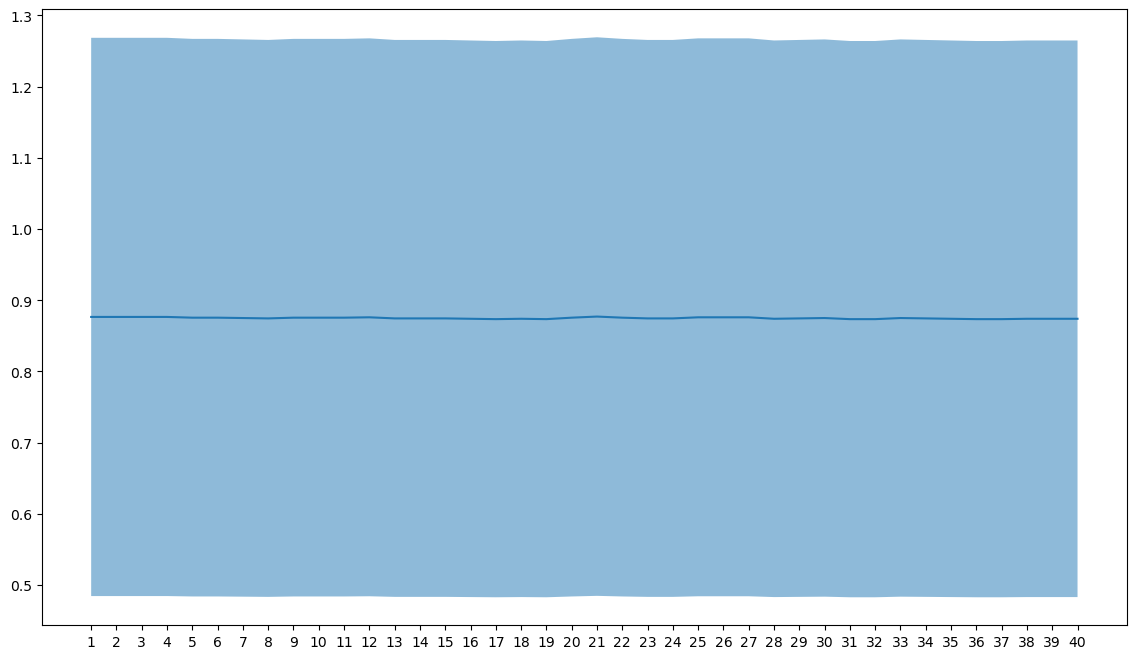

In [16]:
x = np.arange(1,41,1)
mean = selector.cv_results_['mean_test_score']
stderr = selector.cv_results_['mean_test_score']/np.sqrt(5)

plt.figure(figsize=(14, 8))
plt.plot(x, mean)
plt.fill_between(x, np.subtract(mean, stderr), np.add(mean, stderr), alpha = 0.5)
plt.xticks(x)
plt.show

No match difference in the features selections


In [17]:
# Transform the training and test sets to include only the selected 21 features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

model0 = baseline
model0.fit(X_train_selected, y_train)

# Evaluate the model on the selected test data
accuracy = model0.score(X_test_selected, y_test)
print(f'Accuracy on the test set: {accuracy}')

Accuracy on the test set: 0.8804123711340206


In [18]:
print(selected_features)

Index(['BornInUSA', 'NotHisp', 'Mexican', 'PuertoRican', 'OthHisp', 'White',
       'Black', 'AmerInd', 'AsInd', 'Chinese', 'Filipino', 'Japanese',
       'Korean', 'Vietnamese', 'OthPacIsl', 'AgeGrpB',
       'CancerAttention_LocalTV', 'GeneralHealth',
       'MedConditions_HeartCondition', 'MedConditions_LungDisease',
       'MedConditions_Depression'],
      dtype='object')


We see that Age, Ethnicity/Race, Prior Health conditions (as we know from litterature) , but surprinsingly, CancerAttention_LocalTV is also an important features!

This can be an indication that Cancer Attention can be an important factor to predict whether an individual will have cancer.